In [97]:
import pybamm
import matplotlib.pyplot as plt

options = {"thermal": "lumped", "lithium plating": "irreversible","loss of active material": "stress-driven","particle mechanics":"swelling only", "SEI":"ec reaction limited", "SEI film resistance":"average", "SEI porosity change": "true"}
model = pybamm.lithium_ion.SPM(options=options)

experiment = pybamm.Experiment(
    [
        (
            "Discharge at 1C for 1 hour or until 3.0 V",
            "Rest for 10 min",
            "Charge at 1C until 4.1 V",
            "Hold at 4.1 V until 50 mA",
            "Rest for 1 hour",
        ),
    ]
    * 100,
    termination= "0% capacity"
)


parameter_values = pybamm.ParameterValues("OKane2022")

#sim.plot()

In [98]:
# parameter_values.update({"SEI kinetic rate constant [m.s-1]": 1e-12*0.02})
# parameter_values.update({"Ratio of lithium moles to SEI moles": 1.0*2})
# parameter_values.update({"Inner SEI partial molar volume [m3.mol-1]": 9.585e-05*0.5})
# parameter_values.update({"Outer SEI partial molar volume [m3.mol-1]": 9.585e-05*0.5})
# parameter_values.update({"SEI resistivity [Ohm.m]": 200000.0*0.1})
# parameter_values.update({"EC diffusivity [m2.s-1]": 2e-18*0+2.5e-22*4})
# parameter_values.update({"EC initial concentration in electrolyte [mol.m-3]": 4541.0*1})
# parameter_values.update({"SEI growth activation energy [J.mol-1]": 38000.0*0})

In [99]:
# parameter_values.update({"Positive electrode LAM constant proportional term [s-1]": 0/3600})
# parameter_values.update({"Negative electrode LAM constant proportional term [s-1]": 30/3600})
# parameter_values.update({"Positive electrode LAM constant exponential term": 2.0*1.1})
# parameter_values.update({"Negative electrode critical stress [Pa]": 60000000.0*0.0009})
# parameter_values.update({"Negative electrode LAM constant exponential term": 2.0*1.1})
# #parameter_values.update({"Positive electrode partial molar volume [m3.mol-1]": 1.25e-05}) #-7.28e-07
# parameter_values.update({"Positive electrode critical stress [Pa]": 375000000.0*1})




In [100]:
# parameter_values.update({"Negative electrode OCP entropic change [V.K-1]": -0.0002})
# parameter_values.update({"Positive electrode OCP entropic change [V.K-1]": -0.0004})

In [101]:
#parameter_values.search("partial molar")

In [102]:
sim = pybamm.Simulation(model, parameter_values=parameter_values,experiment=experiment)
#sim = pybamm.Simulation(model)
sim.solve()

At t = 517.662, mxstep steps taken before reaching tout.
At t = 37.6544, mxstep steps taken before reaching tout.
At t = 37.6544, mxstep steps taken before reaching tout.
At t = 37.6544, mxstep steps taken before reaching tout.
At t = 0.113398, mxstep steps taken before reaching tout.
At t = 0.112157, mxstep steps taken before reaching tout.
At t = 0.149558, mxstep steps taken before reaching tout.
At t = 0.113594, mxstep steps taken before reaching tout.
At t = 0.119288, mxstep steps taken before reaching tout.
At t = 0.117416, mxstep steps taken before reaching tout.
2024-02-20 20:26:51.955 - [ERROR] callbacks.on_experiment_error(224): Simulation error: Maximum number of decreased steps occurred at t=97034.44937552657 (final SolverError: 'Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "C

In [103]:
sim.plot(["X-averaged cell temperature [K]", "Total heating [W.m-3]", "Current [A]", "Voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=26.643597048757382, step=0.26643597048757384…

In [104]:
sim.plot(['Loss of capacity to negative lithium plating [A.h]','Loss of capacity to negative SEI [A.h]','Total capacity lost to side reactions [A.h]',"Discharge capacity [A.h]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=26.643597048757382, step=0.26643597048757384…

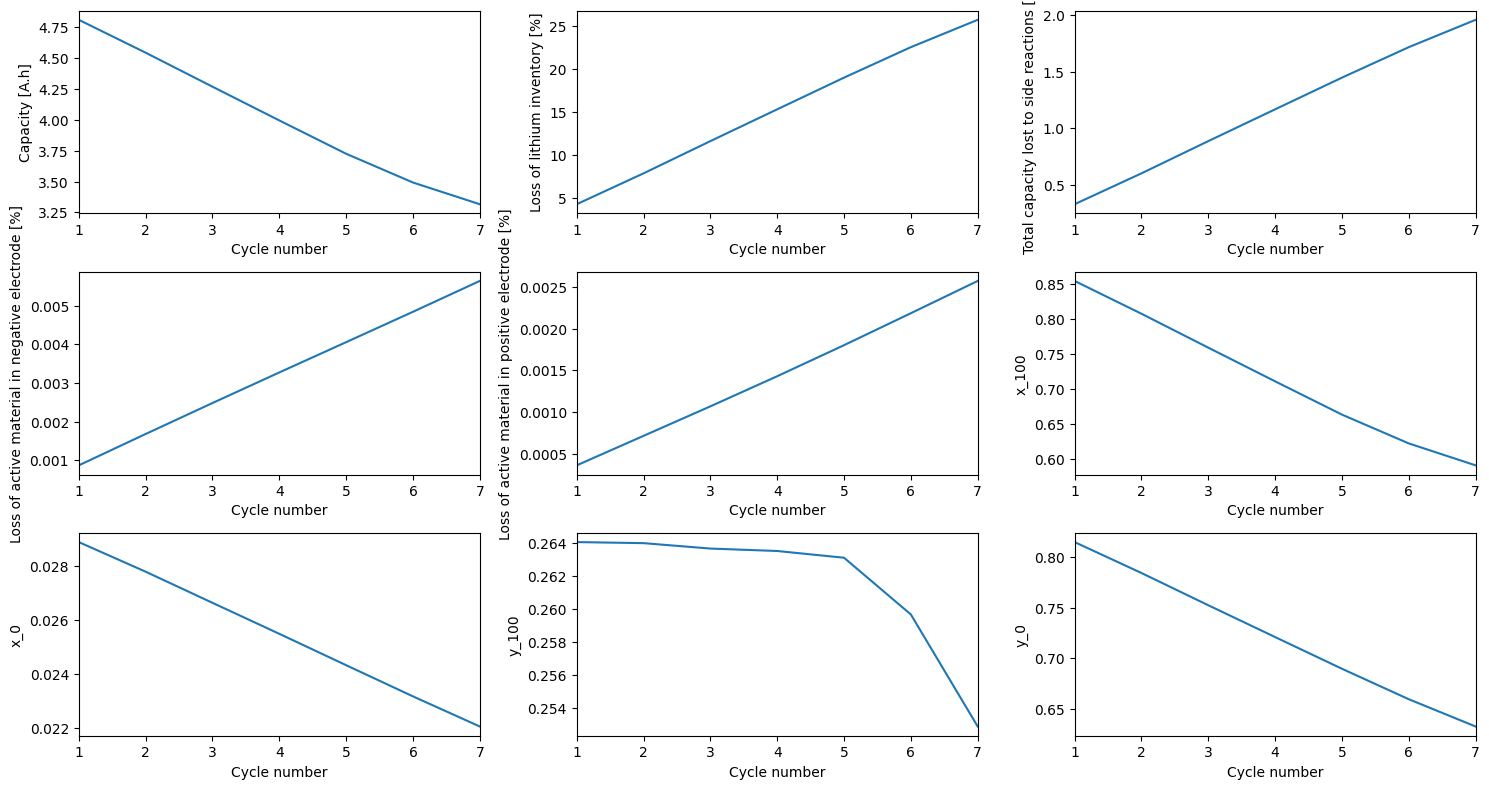

array([[<Axes: xlabel='Cycle number', ylabel='Capacity [A.h]'>,
        <Axes: xlabel='Cycle number', ylabel='Loss of lithium inventory [%]'>,
        <Axes: xlabel='Cycle number', ylabel='Total capacity lost to side reactions [A.h]'>],
       [<Axes: xlabel='Cycle number', ylabel='Loss of active material in negative electrode [%]'>,
        <Axes: xlabel='Cycle number', ylabel='Loss of active material in positive electrode [%]'>,
        <Axes: xlabel='Cycle number', ylabel='x_100'>],
       [<Axes: xlabel='Cycle number', ylabel='x_0'>,
        <Axes: xlabel='Cycle number', ylabel='y_100'>,
        <Axes: xlabel='Cycle number', ylabel='y_0'>]], dtype=object)

In [96]:
pybamm.plot_summary_variables(sim.solution)

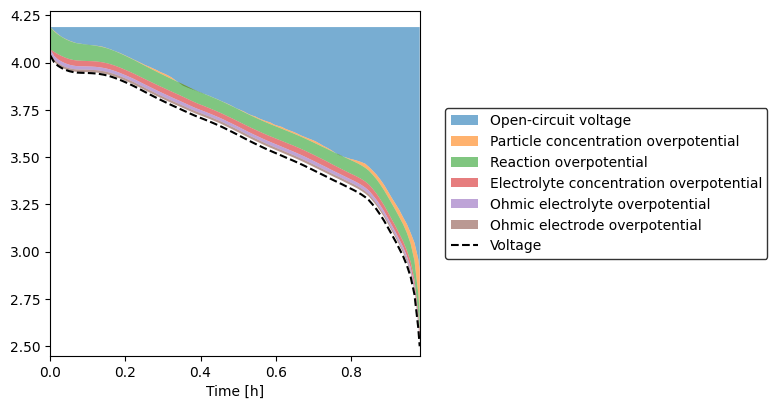

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [12]:
sim.plot_voltage_components()

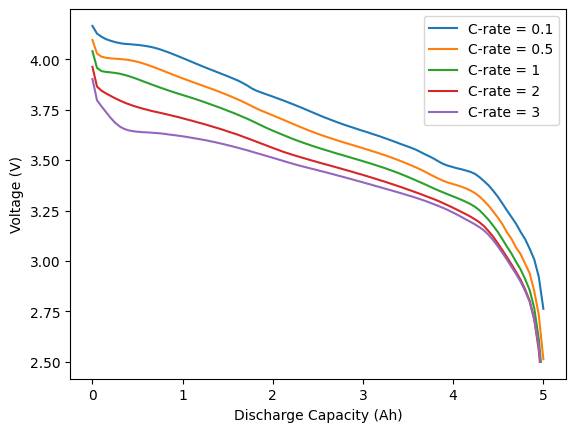

In [6]:
import pybamm

#options = {"thermal": "lumped", "lithium plating": "irreversible","loss of active material": "stress-driven","particle mechanics":"swelling only", "SEI":"ec reaction limited", "SEI film resistance":"average", "SEI porosity change": "true"}
options={"thermal": "lumped"}
model = pybamm.lithium_ion.DFN(options=options)
import matplotlib.pyplot as plt

C_rates = [0.1,0.5, 1, 2, 3]

parameter_values = pybamm.ParameterValues("OKane2022")

for Crate in C_rates:
    sim = pybamm.Simulation(model, parameter_values=parameter_values, C_rate=Crate)
    #sim = pybamm.Simulation(model)
    sim.solve([0, 3600/Crate])
    discharge_capacity = sim.solution["Discharge capacity [A.h]"].entries
    voltage = sim.solution["Voltage [V]"].entries
    plt.plot(discharge_capacity,voltage, label =f"C-rate = {Crate}")
   


plt.xlabel("Discharge Capacity (Ah)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

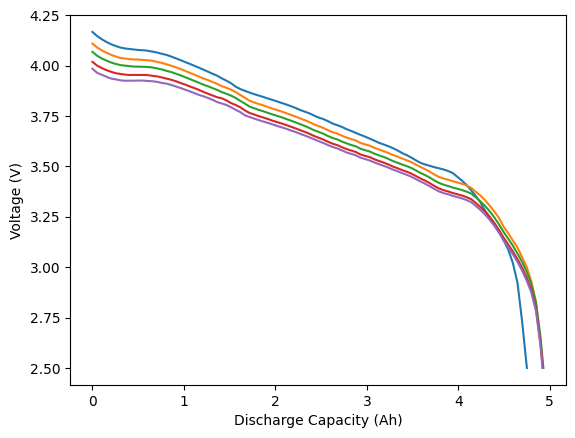

In [1]:
import pybamm

options = {"thermal": "lumped", "lithium plating": "irreversible","loss of active material": "stress-driven","particle mechanics":"swelling only", "SEI":"ec reaction limited", "SEI film resistance":"average", "SEI porosity change": "true"}
model = pybamm.lithium_ion.SPM(options=options)
import matplotlib.pyplot as plt

C_rates = [0.1,0.5, 1, 2, 3]

parameter_values = pybamm.ParameterValues("OKane2022")

for Crate in C_rates:
    sim = pybamm.Simulation(model, parameter_values=parameter_values, C_rate=Crate)
    #sim = pybamm.Simulation(model)
    sim.solve([0, 3600/Crate])
    discharge_capacity = sim.solution["Discharge capacity [A.h]"].entries
    time_entries = sim.solution["Time [s]"].entries
    voltage = sim.solution["Voltage [V]"].entries
    plt.plot(discharge_capacity,voltage)
   
   


plt.xlabel("Discharge Capacity (Ah)")
plt.ylabel("Voltage (V)")
plt.show()

In [2]:
sim.plot(['Loss of capacity to negative lithium plating [A.h]','Loss of capacity to negative SEI [A.h]','Total capacity lost to side reactions [A.h]'])
sim.plot(["Discharge capacity [A.h]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1180.8914593303612, step=11.808914593303612)…

interactive(children=(FloatSlider(value=0.0, description='t', max=1180.8914593303612, step=11.808914593303612)…

In [8]:
model.variable_names()

['Time [s]',
 'Time [min]',
 'Time [h]',
 'x [m]',
 'x_n [m]',
 'x_s [m]',
 'x_p [m]',
 'r_n [m]',
 'r_p [m]',
 'Current variable [A]',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Throughput capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variable',
 'Negative electrode interface utilisation',
 'X-averaged negative electrode interface utilisation',
 'Positive electrode interface utilisation variable',
 'X-averaged positive electrode interface utilisation variable',
 'Positive electrode interface utilisation',
 'X-averaged positive electrode interface utilisation',
 'Negative particle crack length [m]',
 'X-averaged negative particle crack length [m]',
 'Negative particle cracking rate [m.s-1]',
 'X-averaged negative particle cracking rate [m.s-1]',
 'Positive particle crack length [m]',
 'X-averaged positive 

In [19]:
pybamm.print_citations()

[1] Weilong Ai, Ludwig Kraft, Johannes Sturm, Andreas Jossen, and Billy Wu. Electrochemical thermal-mechanical modelling of stress inhomogeneity in lithium-ion pouch cells. Journal of The Electrochemical Society, 167(1):013512, 2019. doi:10.1149/2.0122001JES.
[2] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[3] Ferran Brosa Planella and W. Dhammika Widanage. Systematic derivation of a Single Particle Model with Electrolyte and Side Reactions (SPMe+SR) for degradation of lithium-ion batteries. Submitted for publication, ():, 2022. doi:.
[4] Chang-Hui Chen, Ferran Brosa Planella, Kieran O'Regan, Dominika Gastol, W. Dhammika Widanage, and Emma Kendrick. Development of Experimental Techniques for Parameterization of Multi-scale Lithium-ion Battery Models. Journal of The Electrochemical Soc